In [5]:
import pandas as pd
import numpy as np
np.random.seed(42)

# Hypothesis Testing 

## Review

* Hypothesis tests are used to compare datasets and determine whether any differences are the result of chance
* Hypothesis tests return a **p-value**
* The "p" stands for "probability"
* The p-value tells us whether a dataset's mean is the result of chance
* To choose the right test from `scipy.stats`, think in terms of your dataframe:
    * To compare the mean of **1 column** to a predetermined mean: `ttest_1samp`
        * *Null hypothesis: The column mean is equal to the predetermined mean*
    * To compare the means of **two related columns**: `ttest_rel`
        * *Null hypothesis: For each row, the values in the columns are equal*
    * To compare the means of **two independent columns**: `ttest_ind`
        * *Null hypothesis: The columns' means are equal*
    * To compare the means of **three or more independent columns**: `f_oneway`
        * *Null hypothesis: The columns' means are equal*
    

## ANOVA

* <strong>AN</strong>alysis <strong>O</strong>f the <strong>VA</strong>riance
* We'll be doing a "1-way ANOVA" test
* Used to compare means of three or more groups
* Groups do not necessarily have to be equal in length
* Null hypothesis: groups' means are equal because they have all been drawn from the same population

In [7]:
def decimal_str(x: float, decimals: int = 50) -> str:
    return format(x, f".{decimals}f").lstrip().rstrip('0')

def interpret(alpha, p_val):
    print(f"Probability results occurred by chance: {decimal_str(p_val, 30)}.\nIs our p-value less than the alpha? {'Yes. We reject the null hypothesis! Kill it with fire!' if p_val < alpha else 'No. Our null hypothesis is correct.'}")

def roll(x):
    fair = [1,2,3,4,5,6]
    unfair = [6,2,3,4,5,6]
    return np.random.choice(fair if x == 'fair' else unfair)

In [9]:
r = 1000

df = pd.DataFrame({
    'A_1d': [roll('fair') for _ in range(r)],
    'A_2d': [roll('fair') for _ in range(r)],
    'A_3d': [roll('fair') for _ in range(r)],
    
    'B_1d': [roll('fair') for _ in range(r)],
    'B_2d': [roll('fair') for _ in range(r)],
    'B_3d': [roll('unfair') for _ in range(r)]
})

df.head(5)

,A_1d,A_2d,A_3d,B_1d,B_2d,B_3d
0,4,6,3,1,5,4
1,5,5,6,5,4,6
2,3,6,4,2,3,4
3,5,6,5,5,3,4
4,5,4,5,4,4,4


One of these is not like the others

In [10]:
df.mean()

A_1d    3.457
A_2d    3.500
A_3d    3.568
B_1d    3.502
B_2d    3.439
B_3d    4.333
dtype: float64

In [11]:
from scipy.stats import f_oneway

p_val = f_oneway(
    df['A_1d'],
    df['A_2d'],
    df['A_3d'],
    df['B_1d'],
    df['B_2d'],
    df['B_3d'],
)[1]
decimal_str(p_val) #this is significant small compared to 0.05 meaning something else is going on

'0.00000000000000000000000000000000000000000042671472'

In [12]:
p_val < 0.05

True

An alternate sytnax that pases a list of all columns as *args:

In [15]:
decimal_str(f_oneway( *[df[col] for col in df])[1]) # * args , ** kwargs

'0.00000000000000000000000000000000000000000042671472'

In [18]:
def arg(*args):
    for arg in args:
        print(arg)
        
arg(df['A_1d'])

0      4
1      5
2      3
3      5
4      5
5      2
6      3
7      3
8      3
9      5
10     4
11     3
12     6
13     5
14     2
15     4
16     6
17     6
18     2
19     4
20     5
21     1
22     4
23     2
24     6
25     5
26     4
27     1
28     1
29     3
      ..
970    5
971    4
972    1
973    4
974    2
975    3
976    1
977    5
978    2
979    4
980    6
981    2
982    1
983    4
984    3
985    2
986    1
987    5
988    6
989    4
990    2
991    2
992    3
993    3
994    5
995    6
996    5
997    1
998    1
999    5
Name: A_1d, Length: 1000, dtype: int64


In [19]:
arg(*[1,2]) #treating them as separate arguments

1
2


In [20]:
arg([1,2])

[1, 2]


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

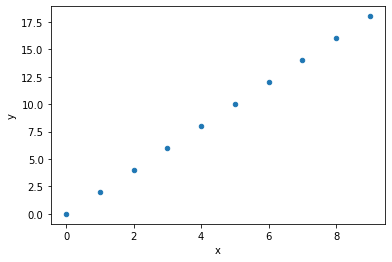

In [2]:
df = pd.DataFrame({
    'x' : range(10),
    'y' : range(0, 20, 2)
})

df.plot('x', 'y', kind = 'scatter')

In [3]:
from scipy.stats import linregress

slope, intercept, r_squared, p_value, std_err = linregress(
    df['x'],
    df['y']
)
slope, intercept, r_squared, p_value, std_err

(2.0, 0.0, 1.0, 4.375000000000076e-80, 0.0)

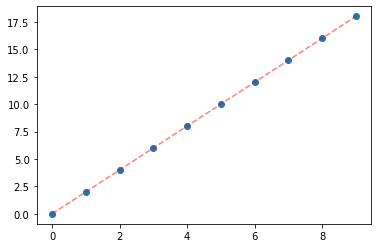

In [4]:
plt.scatter(df['x'], df['y'])
plt.plot(
    df['x'],
    (slope * df['x'])  + intercept, # y = mx + b
    color = 'red',
    alpha = .5,
    linestyle = '--'
)

In [6]:
# R-square value of 1 means taht 100% of the variation in Y is explained by X. The closer
# the R-square is to 1, the more yuor model fits your data and the closer are the observed
# to the fitted values

In [5]:
noise = (.5 - np.random.rand(10)) * 2
noise

array([ 0.61461523, -0.81761316,  0.1984065 ,  0.69891598, -0.44575319,
       -0.6787337 ,  0.7804774 , -0.8290984 , -0.49494707, -0.83492031])

In [7]:
df2 = pd.DataFrame({
    'x': df['x'],
    'y': (df['x'] + noise) * 2
})

df2.head()

,x,y
0,0,1.229230
1,1,0.364774
2,2,4.396813
3,3,7.397832
4,4,7.108494


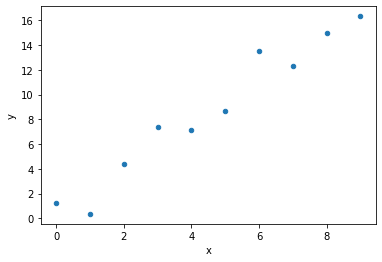

In [8]:
df2.plot('x', 'y', kind = 'scatter')

In [11]:
from scipy.stats import linregress

slope, intercept, r_squared, p_value, std_err = linregress(
    df2['x'],
    df2['y']
)
slope, intercept, r_squared, p_value, std_err

(1.807115419077248,
 0.5062504695358196,
 0.9758317824580359,
 1.4497899830624541e-06,
 0.1430748283140399)

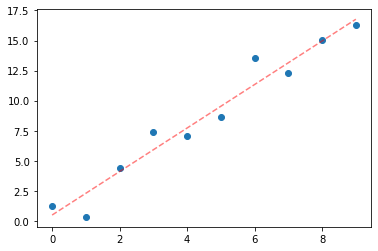

In [12]:
plt.scatter(df2['x'], df2['y'])
plt.plot(
    df2['x'],
    (slope * df2['x'])  + intercept, # y = mx + b
    color = 'red',
    alpha = .5,
    linestyle = '--'
)

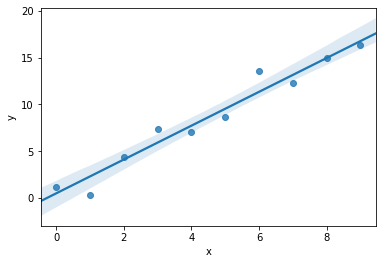

In [13]:
import seaborn as sns

sns.regplot( x = 'x', y = 'y', data = df2)